# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('C:/Users/User/Desktop/ФГУП НТЦ РХБГ 2021/Другое/Data Science/HW/Python/Statistics/HW4/water.csv')
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

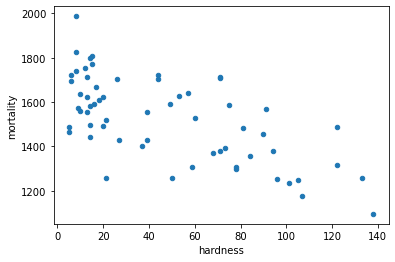

In [4]:
data.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
data[['hardness', 'mortality']].corr() #Пирсон (по умолчанию)

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
data[['hardness', 'mortality']].corr(method='spearman') #Спирман

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [22]:
#Регрессия
X = data[['hardness']]
y = data['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
results = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.coef_[0])
print(model.intercept_)
print(y_pred)

-3.1316708721378266
1668.9722977277095
[1340.14685615 1637.65558901 1625.12890552 1531.17877935 1424.7019697
 1606.33888028 1252.46007173 1434.09698232 1603.20720941 1650.18227249
 1484.20371627 1415.30695708 1546.83713371 1625.12890552 1446.62366581
 1546.83713371 1637.65558901 1621.99723465 1352.67353964]


In [17]:
#Коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

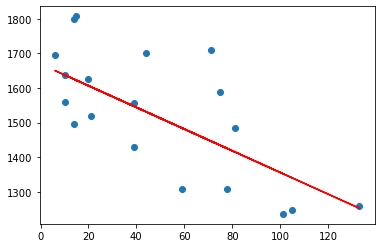

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [24]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [27]:
X_const = sm.add_constant(X_train)

In [28]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           7.83e-06
Time:                        10:58:39   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

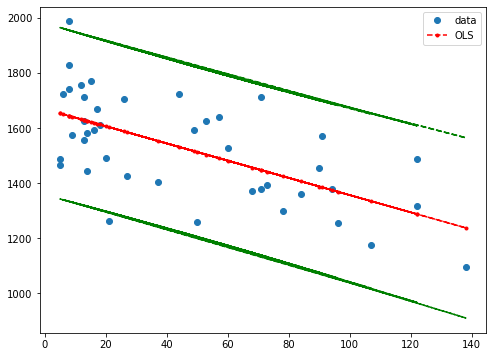

In [29]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

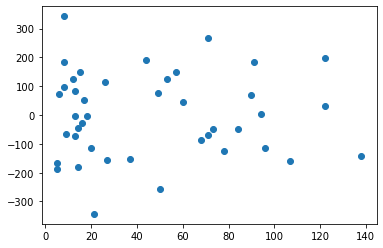

In [30]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

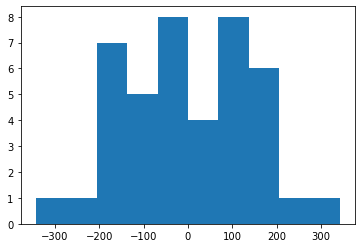

In [31]:
plt.hist(results.resid)

При расчете коэффициента детерминации первый способ показал значение 0.5, а второй 0.39, что говорит о том, что между показателями имеется слабая зависимость, однако, учитывая отрицательную линию тренда и значение коэффициента (-3) стоит допустить недостоверность информации, так как, выходит, что чем больше жесткость воды тем ниже смертность.

# Северные города

In [39]:
North = data.loc[data['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

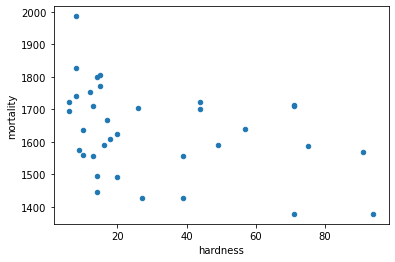

In [41]:
North.plot(kind='scatter', x='hardness', y='mortality')

In [45]:
display(North[['hardness', 'mortality']].corr())

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [42]:
display(North[['hardness', 'mortality']].corr(method='spearman'))

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [46]:
X = North[['hardness']]
y = North['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
results = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.coef_[0])
print(model.intercept_)
print(y_pred)

-1.9768622600638235
1688.150229031281
[1672.33533095 1670.35846869 1660.47415739 1676.28905547 1656.52043287
 1547.79300857 1601.16828959 1672.33533095 1611.05260089 1658.49729513
 1611.05260089]


In [47]:
model.score(X_test, y_test)

0.018885304285745863

<AxesSubplot:xlabel='hardness', ylabel='remains'>

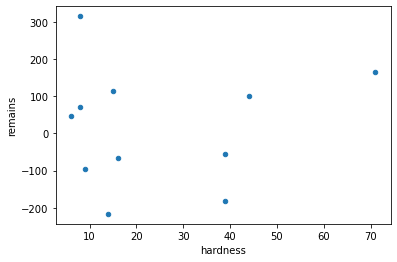

In [50]:
surplus = X_test.copy()

surplus['Y_test'] = y_test
surplus['Y_pred'] = y_pred
surplus['remains'] = y_test - y_pred

surplus.plot(kind='scatter', x='hardness', y='remains')

# Южные города

In [51]:
South = data.loc[data['location'] == 'South']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

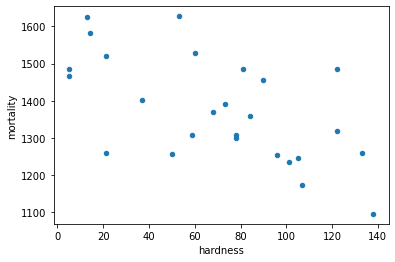

In [52]:
South.plot(kind='scatter', x='hardness', y='mortality')

In [53]:
display(South[['hardness', 'mortality']].corr())

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [54]:
display(South[['hardness', 'mortality']].corr(method='spearman'))

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [56]:
X = South[['hardness']]
y = South['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
results = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.coef_[0])
print(model.intercept_)
print(y_pred)

-3.513429212378229
1640.2204603423374
[1211.58209643 1622.65331428 1271.31039304 1211.58209643 1510.22357948
 1566.43844688 1432.92813681 1622.65331428]


In [57]:
model.score(X_test, y_test)

-2.551922301235205

<AxesSubplot:xlabel='hardness', ylabel='remains'>

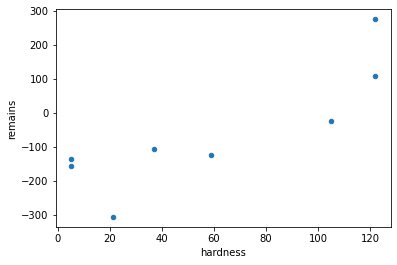

In [58]:
surplus = X_test.copy()

surplus['Y_test'] = y_test
surplus['Y_pred'] = y_pred
surplus['remains'] = y_test - y_pred

surplus.plot(kind='scatter', x='hardness', y='remains')

Анализируя коэффициенты Пирсона и Спирмана большая взаимосвязь прослеживается в южных городах нежели в северных. Коэффициент детерминации показывает почти нулевое значение для северных городов, и минусовое значение для южных городов, что говорит о том, что зависимость слабая, либо нелинейная. Рекомендуется провести иной вид анализа.